In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

In [12]:
df = pd.read_csv('datasets/1667171758.794016.csv').drop(['Unnamed: 0'], axis=1)
df.head(10)

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,y16,x17,y17,x18,y18,x19,y19,x20,y20,Y
0,5,124,0,105,2,81,11,66,17,54,...,98,25,89,27,86,22,95,19,101,Mouse Move
1,6,124,0,106,2,82,11,65,17,54,...,96,26,87,27,84,22,93,20,99,Mouse Move
2,5,124,0,106,2,83,11,68,17,55,...,99,26,89,27,85,21,95,18,102,Mouse Move
3,6,126,0,109,2,85,11,69,17,56,...,98,27,89,28,84,22,95,20,100,Mouse Move
4,5,125,0,107,2,84,10,67,17,54,...,100,25,89,28,84,22,95,18,102,Mouse Move
5,6,125,0,107,3,83,11,67,17,53,...,101,26,89,28,85,22,95,19,102,Mouse Move
6,6,126,0,108,2,84,11,67,17,54,...,98,27,88,28,84,23,95,20,101,Mouse Move
7,5,124,0,106,2,82,10,67,17,54,...,99,25,89,26,85,21,95,18,102,Mouse Move
8,5,125,0,108,2,84,10,67,17,55,...,100,26,89,27,85,22,95,18,102,Mouse Move
9,5,124,0,105,2,82,11,67,17,55,...,99,26,88,27,84,22,94,20,101,Mouse Move


In [13]:
X = df.drop('Y', axis=1, inplace=False)
Y = df['Y']
# Testing overfitting with 90% test size
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.9, shuffle=True)

print("Ejemplos usados para entrenar: ", len(x_train))
print("Ejemplos usados para test: ", len(x_test))

Ejemplos usados para entrenar:  70
Ejemplos usados para test:  633


### Model training

In [14]:
knn = KNeighborsClassifier(9)
knn.fit(x_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(x_train, y_train)))

Accuracy of K-NN classifier on training set: 1.00


In [15]:
pred = knn.predict(x_test)

<AxesSubplot: >

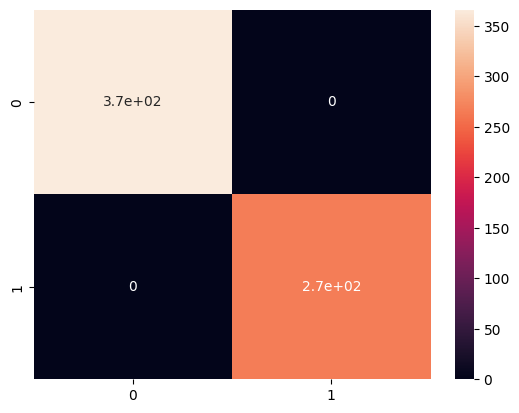

In [16]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True)

In [17]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

  Left Click       1.00      1.00      1.00       366
  Mouse Move       1.00      1.00      1.00       267

    accuracy                           1.00       633
   macro avg       1.00      1.00      1.00       633
weighted avg       1.00      1.00      1.00       633



### Elbow Method

In [18]:
test_error_rates = []

for k in range(1,20):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train, y_train) 
   
    y_pred = knn_model.predict(x_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

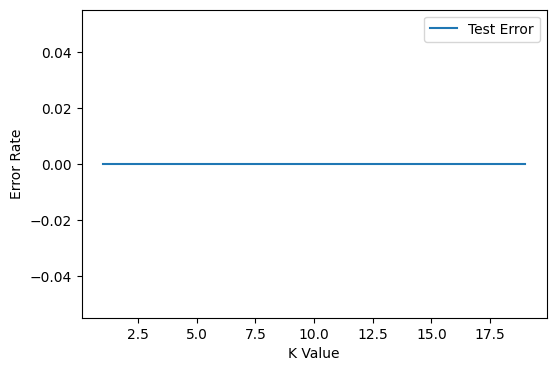

In [19]:
plt.figure(figsize=(6,4),dpi=100)
plt.plot(range(1,20),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")